In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from matplotlib.colors import LogNorm

import astropy.units as unit
from astropy import constants as const
from astropy.table import Table, Column, MaskedColumn, join
from astropy.io import ascii, fits
from astropy.coordinates import SkyCoord
from astropy.io.votable import parse_single_table

# plt.style.use('HCH_plotstyle')

# from time_series import pyaov

# import HCH_variability
# from HCH_variability import *

# import HCH_general
# from HCH_general import *

from scipy import stats

# import varana
# from varana import *


from scipy.optimize import curve_fit
from scipy import interpolate


In [4]:
spec_data = Table.read('./spec_model/T_13000_logg_7.5_HCH.txt', format='ascii')

FileNotFoundError: [Errno 2] No such file or directory: './spec_model/T_13000_logg_7.5_HCH.txt'

Text(0,0.5,'Flux')

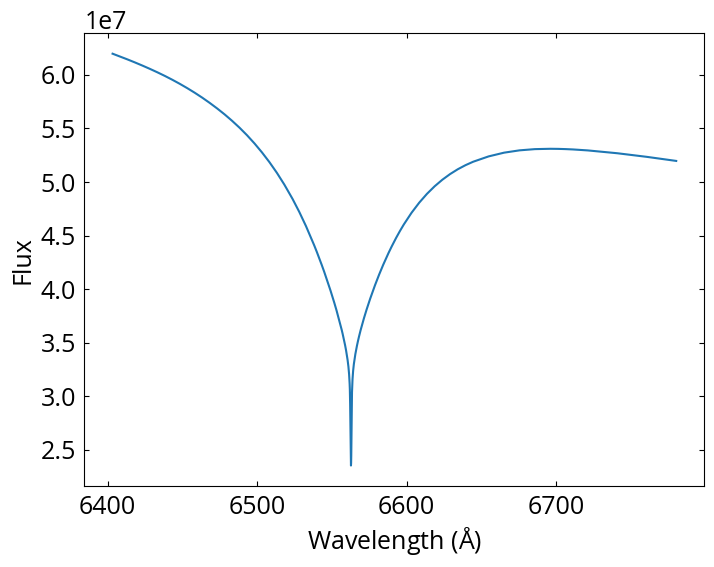

In [21]:
wl_range = (
    (spec_data['WAVELENGTH'] > 6400.) *
    (spec_data['WAVELENGTH'] < 6800)
)
plt.plot(
    spec_data['WAVELENGTH'][wl_range], 
    spec_data['FLUX'][wl_range]
)

plt.xlabel(r'Wavelength ($\rm \AA$)')
plt.ylabel('Flux')

In [53]:
#functionalize

spec_func = interpolate.interp1d(spec_data['WAVELENGTH'], spec_data['FLUX'])

In [24]:
spec_func(4000)

array(1.90659446e+08)

In [62]:
#orbit simulator

def orbit_flux_simulator (spec_func, sim_wl, M1, M2, a=0, period=0, N_resolution=500):
    sim_flux = np.zeros_like(sim_wl)
    Msun = 2e33
    Rsun = 7e10
    G = 6.67e-8
    c = 3e10

    M1 = M1 * Msun
    M2 = M2 * Msun
    Mtot = M1 + M2

    if a == 0 and period == 0:
        print('Need to specify either a (separation) or period')
        return
    elif period==0:
        period = 2 * np.pi * np.sqrt(a**3 / G / Mtot )
    elif a == 0:
        a = ((period / 2 / np.pi)**2 * G * Mtot )**(1/3.)
    else:
        print('Need to specify either a (separation) or period (only)')
        return

    v1 = 2 * np.pi * (a * M2/Mtot) / period

    dt = period / N_resolution

    inclination = 90. #in degree




    for i in range(N_resolution):
        t = dt * i
        phi = 2 * np.pi * t / period

        v_x = v1 * (-np.sin(phi)) * np.sin(inclination)

        sim_flux += spec_func(sim_wl * (1. + (-v_x) / c)) * 1/N_resolution
    
    print(sim_flux)
    return sim_flux

In [41]:
period/60

4.847380820776147

In [42]:
v1/1e5

756.1179046380832

[78600028.0518008  78597857.111659   78595686.29242833 ...
 47081903.36420474 47080798.91688991 47079694.4947938 ]
[78599571.87133847 78597401.35673961 78595230.90712057 ...
 47081802.12941953 47080700.90883277 47079599.68824594]
[78599159.35094933 78596988.37949559 78594817.48425089 ...
 47081802.12941957 47080700.90883277 47079599.68824596]
[78599042.34737764 78596872.4494349  78594702.5858382  ...
 47081802.12941958 47080700.90883276 47079599.68824597]


(6400, 6700)

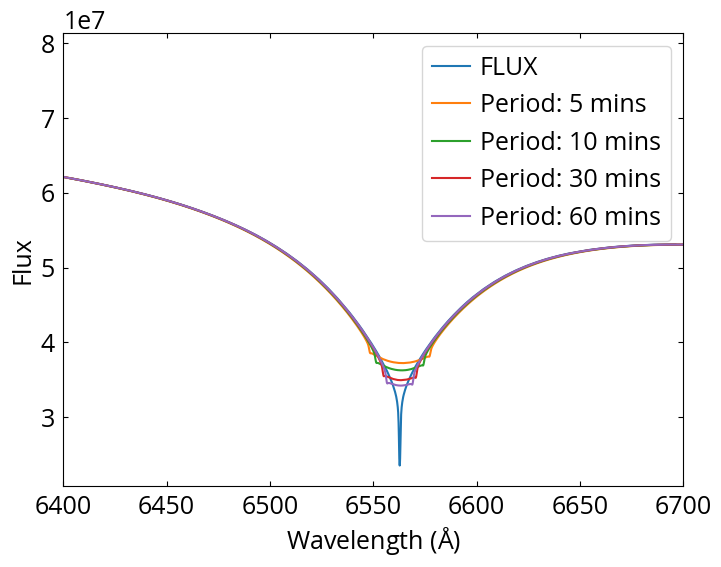

In [64]:
wl_range = (
    (spec_data['WAVELENGTH'] > 6400.) *
    (spec_data['WAVELENGTH'] < 6700)
)
plt.plot(
    spec_data['WAVELENGTH'][wl_range], 
    spec_data['FLUX'][wl_range]
)

sim_wl = np.arange(6000., 7000., 0.05)
period_list = np.array([5, 10, 30, 60]) * 60

for period in period_list:
    sim_flux = orbit_flux_simulator(spec_func, sim_wl, 0.6, 0.6, period=period)
    plt.plot(
        sim_wl,
        sim_flux,
        label='Period: %d mins' %(period/60)
    )

plt.xlabel(r'Wavelength ($\rm \AA$)')
plt.ylabel('Flux')
plt.legend()
plt.xlim([6400, 6700])

In [50]:
sim_flux

In [61]:
sim_wl.shape

(20000,)